# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 29 (delta 2), reused 3 (delta 1), pack-reused 21 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 6.13 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
# Importing relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [3]:
# Saving the breast cancer CSV to a Pandas dataframe
mammogram_df = pd.read_csv('/content/the_bootstrap/data/mammogram.csv')

In [4]:
# 1.
# Cross-tabulating treatment with breast cancer death
pd.crosstab(mammogram_df['treatment'], mammogram_df['breast_cancer_death'])

breast_cancer_death,no,yes
treatment,,
control,44405,505
mammogram,44425,500


In [5]:
# It seems you're only slightly less likely to die of breast cancer
#  if provided mammograms. 5 less people died than the control.

In [6]:
# 2.
# Bootstraping the densities/distributions of the survival rate for both groups

# Number of bootstrap iterations
n_iterations = 1000

# Create empty lists to store the bootstrap results
control_survival_rates = []
mammogram_survival_rates = []

# Loop through the iterations
for _ in range(n_iterations):
    # Resample the data with replacement for each group
    control_sample = mammogram_df[mammogram_df['treatment'] == 'control'].sample(frac=1, replace=True)
    mammogram_sample = mammogram_df[mammogram_df['treatment'] == 'mammogram'].sample(frac=1, replace=True)

    # Calculate the survival rate for each sample and append to the lists
    control_survival_rates.append(control_sample['breast_cancer_death'].value_counts(normalize=True).get('no', 0))
    mammogram_survival_rates.append(mammogram_sample['breast_cancer_death'].value_counts(normalize=True).get('no', 0))

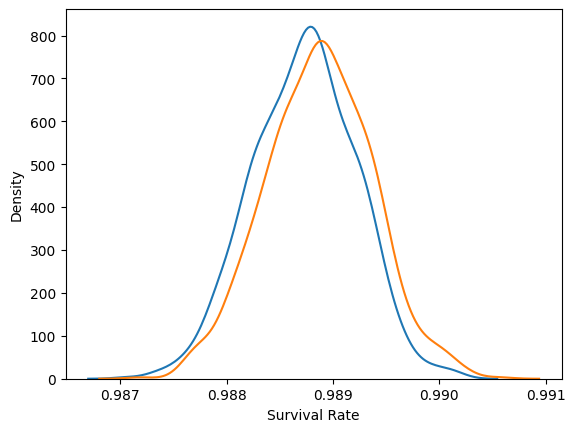

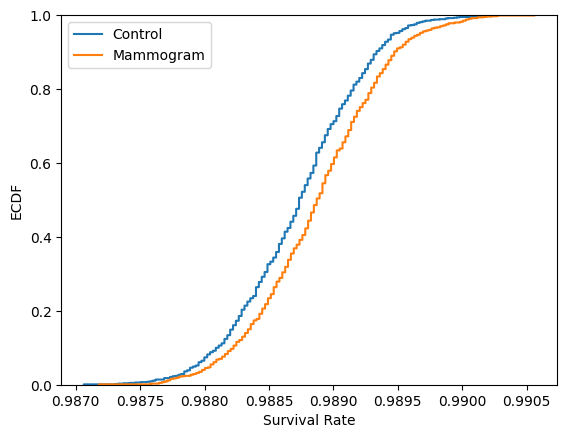

In [7]:
# Plotting the density and distribution
sns.kdeplot(control_survival_rates, label='Control')
sns.kdeplot(mammogram_survival_rates, label='Mammogram')
plt.xlabel('Survival Rate')
plt.ylabel('Density')
plt.show()

sns.ecdfplot(control_survival_rates, label='Control')
sns.ecdfplot(mammogram_survival_rates, label='Mammogram')
plt.xlabel('Survival Rate')
plt.ylabel('ECDF')
plt.legend()
plt.show()

In [8]:
# 3.
# Constructing a 99% CI for the difference in outcomes between the two groups
diff_in_means = [mammogram_survival_rates[i] - control_survival_rates[i] for i in range(n_iterations)]

# Calculate the 99% confidence interval
lower_bound = np.percentile(diff_in_means, 0.5)
upper_bound = np.percentile(diff_in_means, 99.5)

print(f"99% CI: ({lower_bound}, {upper_bound})")

99% CI: (-0.0016224383844669166, 0.0018514726354954237)


In [9]:
# This 99% CI contains zero, meaning up to a confidence of 99%, there is not
#  a statistically significant increase in survival betweeen the two groups.

In [11]:
# 4.
# In order to further test the efficacy of mammograms we could re-examine
#  or alter some of the procedures from this test. There might
#  be some issues with how they collected the data.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

In [17]:
# Saving the diabetes CSV to a Pandas dataframe
diabetes_df = pd.read_csv('/content/the_bootstrap/data/diabetes_hw.csv')

In [18]:
# 1.
# Cross-tabulating treatment and outcome
pd.crosstab(diabetes_df['treatment'], diabetes_df['outcome'])

outcome,failure,success
treatment,,
lifestyle,109,125
met,120,112
rosi,90,143


In [19]:
# 2.
# Computing the proportion of success for each treatment type
success_rates = diabetes_df.groupby('treatment')['outcome'].value_counts(normalize=True).unstack()
success_rates

outcome,failure,success
treatment,,
lifestyle,0.465812,0.534188
met,0.517241,0.482759
rosi,0.386266,0.613734


In [20]:
# It seems that rosiglitazone had the highest success rate at ~61%, followed
#  by lifestyle changes at 53%. metformin was in last with a 48% success rate.

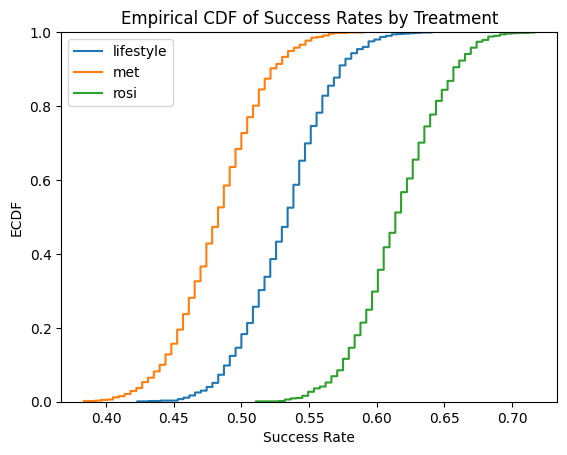

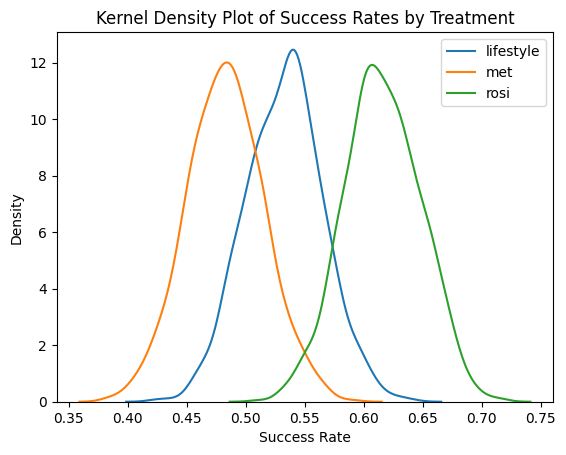

In [21]:
# 3.
# Number of bootstrap iterations
n_iterations = 1000

# Create a dictionary to store the bootstrap results for each treatment
treatment_success_rates = {'lifestyle': [], 'met': [], 'rosi': []}

# Loop through the iterations
for _ in range(n_iterations):
    # Resample the data with replacement for each treatment group
    for treatment in treatment_success_rates.keys():
        treatment_sample = diabetes_df[diabetes_df['treatment'] == treatment].sample(frac=1, replace=True)
        # Calculate the success rate for each sample and append to the dictionary
        treatment_success_rates[treatment].append(treatment_sample['outcome'].value_counts(normalize=True).get('success', 0))

# Create empirical CDF and kernel density plots
for treatment in treatment_success_rates.keys():
    sns.ecdfplot(treatment_success_rates[treatment], label=treatment)
plt.xlabel('Success Rate')
plt.ylabel('ECDF')
plt.legend()
plt.title('Empirical CDF of Success Rates by Treatment')
plt.show()

for treatment in treatment_success_rates.keys():
    sns.kdeplot(treatment_success_rates[treatment], label=treatment)
plt.xlabel('Success Rate')
plt.ylabel('Density')
plt.legend()
plt.title('Kernel Density Plot of Success Rates by Treatment')
plt.show()

In [22]:
# 4.
# Calculate differences in means for each comparison
lifestyle_vs_met = [treatment_success_rates['lifestyle'][i] - treatment_success_rates['met'][i] for i in range(n_iterations)]
met_vs_rosi = [treatment_success_rates['met'][i] - treatment_success_rates['rosi'][i] for i in range(n_iterations)]
rosi_vs_lifestyle = [treatment_success_rates['rosi'][i] - treatment_success_rates['lifestyle'][i] for i in range(n_iterations)]

# Calculate the 90% confidence intervals
lifestyle_vs_met_ci = np.percentile(lifestyle_vs_met, [5, 95])
met_vs_rosi_ci = np.percentile(met_vs_rosi, [5, 95])
rosi_vs_lifestyle_ci = np.percentile(rosi_vs_lifestyle, [5, 95])

print(f"90% CI for lifestyle vs. met: {lifestyle_vs_met_ci}")
print(f"90% CI for met vs. rosi: {met_vs_rosi_ci}")
print(f"90% CI for rosi vs. lifestyle: {rosi_vs_lifestyle_ci}")

90% CI for lifestyle vs. met: [-0.02550656  0.12872274]
90% CI for met vs. rosi: [-0.20850599 -0.05790107]
90% CI for rosi vs. lifestyle: [0.00680368 0.1608901 ]


In [23]:
# Rosi seems to be better than lifestyle because the 90% CI
#  doesn't include zero, meaning we can reject the null hypothesis.
#  However, this isn't the case of the other two comparisons.

In [24]:
# 5.
# Rosi seems to be the most effective overall, given that it
#  proportionally treated the most people and was the most
#  effective to a 90% CI when compared to the other two treatments.